<a href="https://colab.research.google.com/github/vngeno/DATA-ANALYSIS-OF-OWNERSHIP-OF-BANK-ACCOUNTS-IN-SELECT-EAST-AFRICAN-COUNTRIES/blob/main/EXPLORATORY_DATA_ANALYSIS_OF_OWNERSHIP_OF_BANK_ACCOUNTS_IN_SELECT_EAST_AFRICAN_COUNTRIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define the Question


**Which individuals are most likely to have or use a bank account?**

#Metric of Success

To identify individuals that are most likely to have a or use a bank account

#Understanding the Context

Pivotal role of traditional banking in the wake of mobile money in Africa and growth of innovative fintech solutions.

#Recording the Experimental Design

We're going to clean and tidy up our data, and in the analysis use statistical methods such as finding measures of central tendency and visualization techniques to come up with a relevant conlusion

#Data Relevance

The importance of this data will enable us to determine the uptake of bank accounts by basis of need and provide insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#Reading the Data

In [1]:
#importing the libraries needed for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading The Dataset
#Dataset: http://bit.ly/FinancialDataset
df_fin = pd.read_csv('http://bit.ly/FinancialDataset')
df_fin

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
#Loading the variables definitions
df_def = pd.read_csv('http://bit.ly/VariableDefinitions')
df_def


,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [4]:
#Determining no. of records in our dataset
df_fin.shape

(23524, 13)

In [5]:
#Previewing the top of oue dataset
df_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
#Previewing the bottom of our dataset
df_fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
#Checking appropriate data types in each column
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
df_fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [9]:
#checking the column names
df_fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [10]:
#renaming the Respondent Age column
df_fin.rename(columns={"Respondent Age":"Respondent_Age"}, inplace=True)
df_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


#Tidying the Dataset

##Handling missing values

In [11]:
#Checking for missing values
df_fin.isnull().sum()


country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent_Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [12]:
df_fin.corr()

,year,household_size,Respondent_Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent_Age,-0.019570,-0.119709,1.000000


There are a few missing values hence we can drop the values.


In [13]:
#Dropping the missing values
df_fin.dropna(inplace=True)
df_fin.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent_Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

##Handling duplicate records

In [14]:
#Checking for duplicate records
df_fin.duplicated().sum()

0

There are no duplicate records. Hence we can proceed.


##Handling Outliers

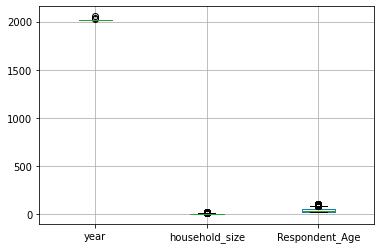

In [15]:
#We first check for outliers using the boxplot method
df_fin.boxplot()

In [16]:
df_fin = df_fin[df_fin.year < 2019] #The data was taken in 2018 hence we will remove any records that appear after 2018
df_fin[df_fin.year > 2018]
df_fin['year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
23519    2018
23520    2018
23521    2018
23522    2018
23523    2018
Name: year, Length: 23340, dtype: int64

In [17]:
Q1_household_size = df_fin['household_size'].quantile(.25)
Q3_household_size = df_fin['household_size'].quantile(.75)

IQR_household_size = Q3_household_size - Q1_household_size
IQR_household_size

Q1_Respondent_Age = df_fin['Respondent_Age'].quantile(.25)
Q3_Respondent_Age = df_fin['Respondent_Age'].quantile(.75)

IQR_Respondent_Age = Q3_Respondent_Age - Q1_Respondent_Age
IQR_Respondent_Age

lower_bound_household_size = Q1_household_size - (1.5*IQR_household_size)
upper_bound_household_size = Q3_household_size + (1.5*IQR_household_size)

lower_bound_Respondent_Age = Q1_Respondent_Age - (1.5*IQR_Respondent_Age)
upper_bound_Respondent_Age = Q3_Respondent_Age + (1.5*IQR_Respondent_Age)

In [18]:
#Dealing with otliers and anomalies
df_fin = df_fin[df_fin.household_size <= upper_bound_household_size]
df_fin
df_fin = df_fin[df_fin.Respondent_Age <= upper_bound_Respondent_Age]
df_fin

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


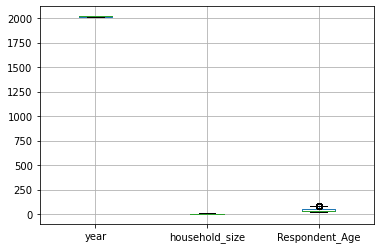

In [19]:
df_fin.boxplot()

From the above, the lower bounds from the IQR were ignored since they were negatives hence have no implications in the household or respondent age columns


#THE ANALYSIS

##UNIVARIATE ANALYSIS

In [20]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   Has a Bank account      22725 non-null  object 
 4   Type of Location        22725 non-null  object 
 5   Cell Phone Access       22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   Respondent_Age          22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   The relathip with head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  Level of Educuation     22725 non-null  object 
 12  Type of Job             22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


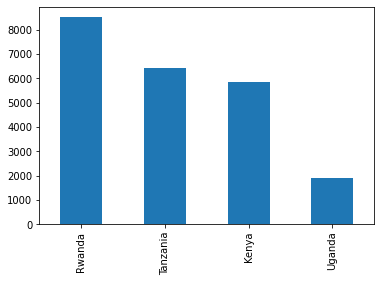

In [21]:
#Records from the four countries
df_fin['country'].value_counts().plot.bar()

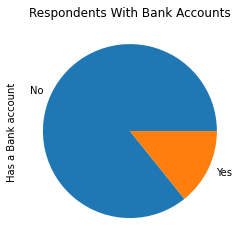

In [22]:
df_fin['Has a Bank account'].value_counts().plot(kind='pie')
plt.title('Respondents With Bank Accounts');

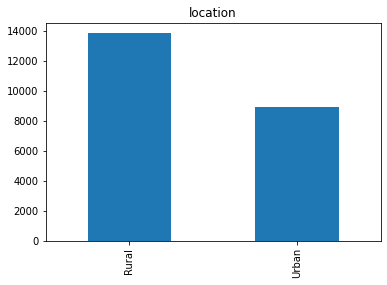

In [23]:
df_fin['Type of Location'].value_counts().plot(kind='bar')
plt.title('location');
#More people live in the rural areas than urban urban areas

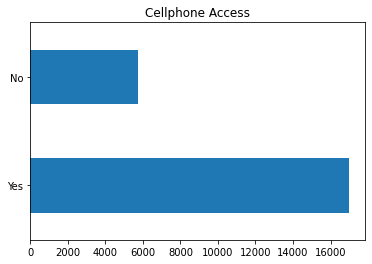

In [24]:
df_fin['Cell Phone Access'].value_counts().plot(kind='barh')
plt.title('Cellphone Access');
#More people have access to cellphones

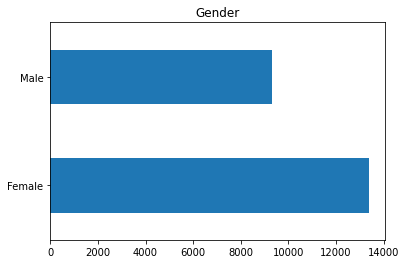

In [25]:
df_fin['gender_of_respondent'].value_counts().plot(kind='barh')
plt.title('Gender');

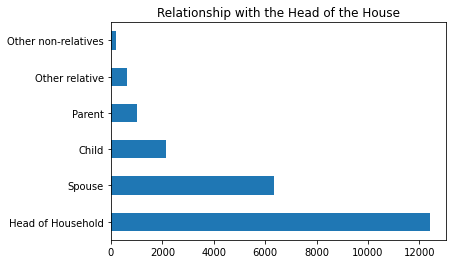

In [26]:
df_fin['The relathip with head'].value_counts().plot(kind='barh')
plt.title('Relationship with the Head of the House');

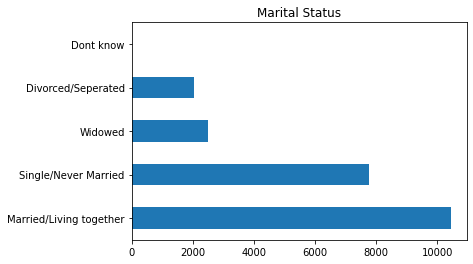

In [27]:
df_fin['marital_status'].value_counts().plot(kind='barh')
plt.title('Marital Status');
#Most respondents were married followed by singles

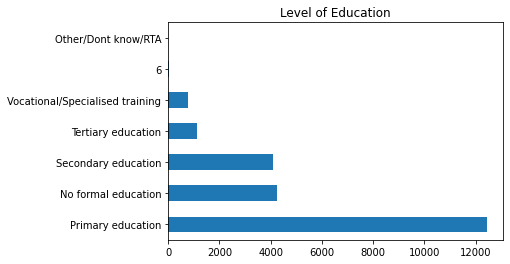

In [28]:
df_fin['Level of Educuation'].value_counts().plot(kind='barh')
plt.title('Level of Education');
#Most people have basic primary education, the aspect '6' needs further investigation

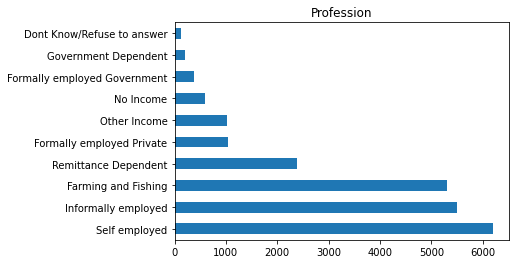

In [29]:
df_fin['Type of Job'].value_counts().plot(kind='barh')
plt.title('Profession');
#Most respondents are self employed, informally employed, farmers and fishermen

In [30]:
#Ranges of the numeric data
print('Range of Year: ' +str(df_fin['year'].max() - df_fin['year'].min()))
print('Range of Household Size: ' +str(df_fin['household_size'].max() - df_fin['household_size'].min()))
print('Range of Respondent Age: ' +str(df_fin['Respondent_Age'].max() - df_fin['Respondent_Age'].min()))

Range of Year: 2
Range of Household Size: 9.0
Range of Respondent Age: 67.0


In [31]:
#Standard Deviation of numeric data
print('Standard Deviation of Year: ' +str(df_fin['year'].std()))
print('Standard Deviation of Household Size ' +str(df_fin['household_size'].std()))
print('Standard Deviation of Respondent Age ' +str(df_fin['Respondent_Age'].std()))

Standard Deviation of Year: 0.8463657883520268
Standard Deviation of Household Size 2.080542136724138
Standard Deviation of Respondent Age 15.806141256107674


In [32]:
#Variance of numeric data
print('Variance of Year: ' +str(df_fin['year'].var()))
print('Variance of Household Size ' +str(df_fin['household_size'].var()))
print('Variance of Respondent Age ' +str(df_fin['Respondent_Age'].var()))

Variance of Year: 0.7163350476927479
Variance of Household Size 4.328655582684643
Variance of Respondent Age 249.83410140802906


In [33]:
#Skewness of the numeric data
print('Skewness of Year: ' +str(df_fin['year'].skew()))
print('Skewness of Household Size ' +str(df_fin['household_size'].skew()))
print('Skewness of Respondent Age ' +str(df_fin['Respondent_Age'].skew()))

Skewness of Year: 0.06035122899784449
Skewness of Household Size 0.6058745818063943
Skewness of Respondent Age 0.7402138281724044


Positive values indicate that the tail of the data is right-skewed. The skew of the year seems negligible and could be symmetrical/non-skewed.

In [34]:
#Kurtosis of the numeric data
print('Kurtosis of Year: ' +str(df_fin['year'].kurt()))
print('Kurtosis of Household Size ' +str(df_fin['household_size'].kurt()))
print('Kurtosis of Respondent Age ' +str(df_fin['Respondent_Age'].kurt()))

Kurtosis of Year: -1.6014658084675666
Kurtosis of Household Size -0.5055780598336774
Kurtosis of Respondent Age -0.23749387799691757


The data has negative kurtosis indicating that the distribution has lighter tails and a flatter peak than the normal distribution

In [35]:
#Finding measures of central tendency
df_fin.describe()

,year,household_size,Respondent_Age
count,22725.000000,22725.000000,22725.000000
mean,2016.968185,3.579846,38.347987
std,0.846366,2.080542,15.806141
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


##Bivariate Analysis

Checking the column names

In [36]:
df_fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

What is the relationship of the variables to each other?

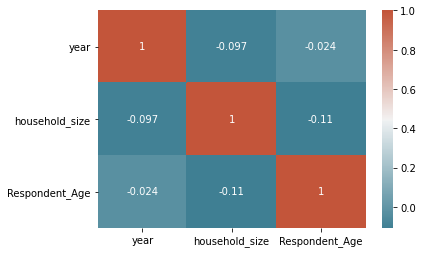

In [37]:
#Finding the Correlation between variables
corr = df_fin.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Number of respondents in the four countries with and without bank accounts

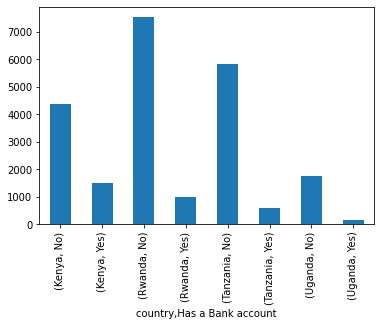

In [38]:
df_fin.groupby('country')['Has a Bank account'].value_counts().plot.bar()

Visualization of respondents in rural and urban areas with or without bank accounts

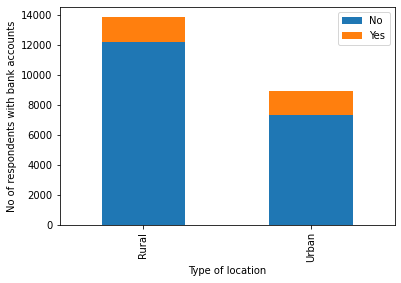

In [39]:
#Stacked column showing number of respondents with bank accounts in rural and urban areas
df_fin.groupby('Type of Location')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True)
plt.legend(loc="upper right")
plt.ylabel('No of respondents with bank accounts')
plt.xlabel('Type of location')
plt.show()

Gender of respondents with or without bank accounts

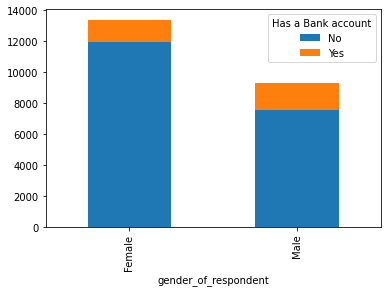

In [40]:
df_fin.groupby('gender_of_respondent')['Has a Bank account'].value_counts().unstack().plot.bar(stacked=True);

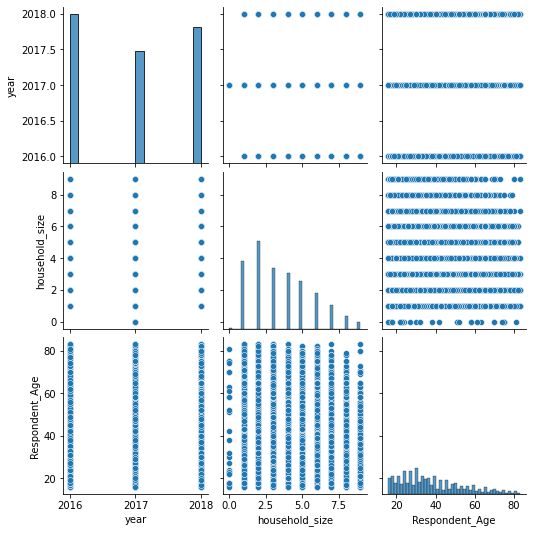

In [41]:
sns.pairplot(df_fin)
#This confirms lack of correlation between the numeric variables

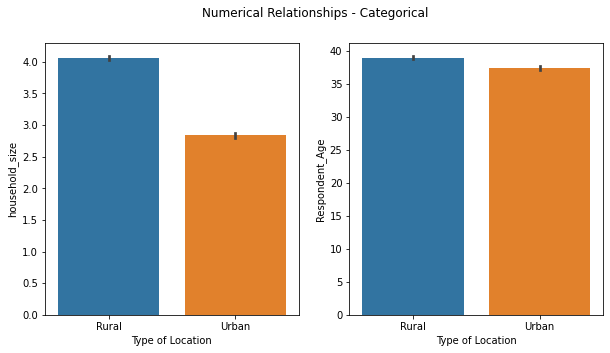

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Numerical Relationships - Categorical')
sns.barplot(x= df_fin['Type of Location'], y=df_fin['household_size'], ax=ax1)
sns.barplot(x= df_fin['Type of Location'], y=df_fin['Respondent_Age'], ax=ax2)
plt.show()

#Rural areas had an average of 4 people per house while uraban areas had ~2.8
#Respondent Ages in both rural and urban areas are almost similar

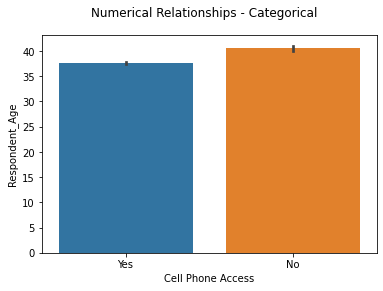

In [43]:
fig, ax = plt.subplots(1, figsize=(6,4))
fig.suptitle('Numerical Relationships - Categorical')
sns.barplot(x=df_fin['Cell Phone Access'], y=df_fin['Respondent_Age'], ax=ax)
plt.show()

#Average age of respondents with Cellphone access is ~37 and those without cellphones is ~40

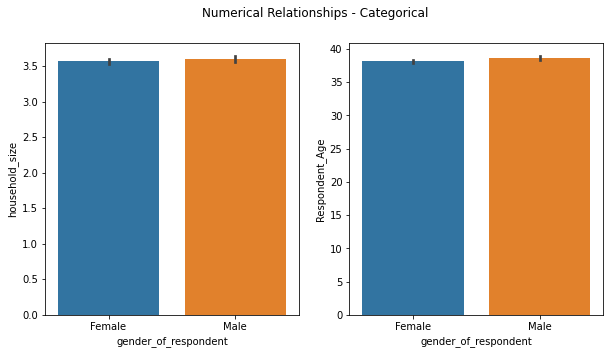

In [44]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Numerical Relationships - Categorical')
sns.barplot(x= df_fin['gender_of_respondent'], y=df_fin['household_size'], ax=ax1)
sns.barplot(x= df_fin['gender_of_respondent'], y=df_fin['Respondent_Age'], ax=ax2)
plt.show()

#Respondent age & household size are similar in comparison to gender

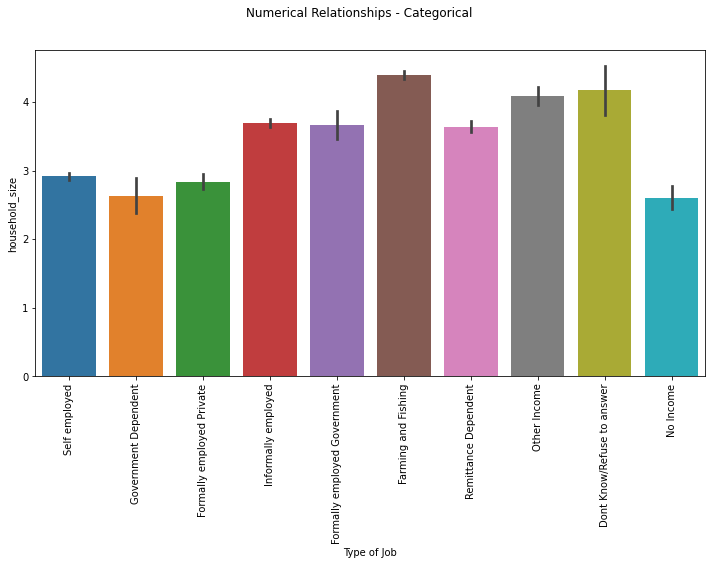

In [68]:
fig, ax = plt.subplots(1,figsize=(12,6))
fig.suptitle('Numerical Relationships - Categorical')
sns.barplot(x= df_fin['Type of Job'], y=df_fin['household_size'], ax=ax)
plt.xticks(rotation=90)
plt.show();


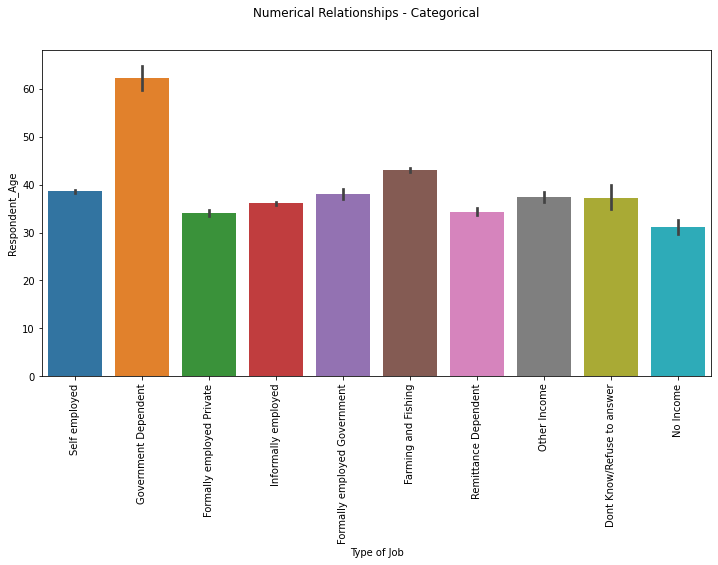

In [66]:
fig, ax = plt.subplots(1, figsize=(12,6))
fig.suptitle('Numerical Relationships - Categorical')
sns.barplot(x= df_fin['Type of Job'], y=df_fin['Respondent_Age'], ax=ax)
plt.xticks(rotation=90)
plt.show();

From the above, bigger households largely depend on fishing whilst the elderly largely depend on the government for their livelihood

#Multivariate Analysis

In [46]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 22725 non-null  object 
 1   year                    22725 non-null  int64  
 2   uniqueid                22725 non-null  object 
 3   Has a Bank account      22725 non-null  object 
 4   Type of Location        22725 non-null  object 
 5   Cell Phone Access       22725 non-null  object 
 6   household_size          22725 non-null  float64
 7   Respondent_Age          22725 non-null  float64
 8   gender_of_respondent    22725 non-null  object 
 9   The relathip with head  22725 non-null  object 
 10  marital_status          22725 non-null  object 
 11  Level of Educuation     22725 non-null  object 
 12  Type of Job             22725 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.1+ MB


In [47]:
df_fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [48]:
#Data for label encoding

Fin_encode = df_fin.copy(deep=True)
Fin_encode['Type of Job'] = Fin_encode['Type of Job'].astype('category')
Fin_encode['Level of Educuation'] = Fin_encode['Level of Educuation'].astype('category')
Fin_encode['country'] = Fin_encode['country'].astype('category')
Fin_encode['Type of Location'] = Fin_encode['Type of Location'].astype('category')
Fin_encode['Cell Phone Access'] = Fin_encode['Cell Phone Access'].astype('category')
Fin_encode['gender_of_respondent'] = Fin_encode['gender_of_respondent'].astype('category')
Fin_encode['The relathip with head'] = Fin_encode['The relathip with head'].astype('category')
Fin_encode['marital_status'] = Fin_encode['marital_status'].astype('category')
Fin_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 22725 non-null  category
 1   year                    22725 non-null  int64   
 2   uniqueid                22725 non-null  object  
 3   Has a Bank account      22725 non-null  object  
 4   Type of Location        22725 non-null  category
 5   Cell Phone Access       22725 non-null  category
 6   household_size          22725 non-null  float64 
 7   Respondent_Age          22725 non-null  float64 
 8   gender_of_respondent    22725 non-null  category
 9   The relathip with head  22725 non-null  category
 10  marital_status          22725 non-null  category
 11  Level of Educuation     22725 non-null  category
 12  Type of Job             22725 non-null  category
dtypes: category(8), float64(2), int64(1), object(2)
memory usage: 1.8+ MB


In [49]:
#Label encoding the categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Fin_encode = df_fin.copy(deep=True)
Fin_encode['Type of Job'] = labelencoder.fit_transform(Fin_encode['Type of Job'])
Fin_encode['Level of Educuation'] = labelencoder.fit_transform(Fin_encode['Level of Educuation'])
Fin_encode['country'] = labelencoder.fit_transform(Fin_encode['country'])
Fin_encode['Type of Location'] = labelencoder.fit_transform(Fin_encode['Type of Location'])
Fin_encode['Cell Phone Access'] = labelencoder.fit_transform(Fin_encode['Cell Phone Access'])
Fin_encode['gender_of_respondent'] = labelencoder.fit_transform(Fin_encode['gender_of_respondent'])
Fin_encode['The relathip with head'] = labelencoder.fit_transform(Fin_encode['The relathip with head'])
Fin_encode['marital_status'] = labelencoder.fit_transform(Fin_encode['marital_status'])
Fin_encode.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9
3,0,2018,uniqueid_4,No,0,1,5.0,34.0,0,1,2,3,3
4,0,2018,uniqueid_5,No,1,0,8.0,26.0,1,0,3,3,5


##Linear Discriminant Analysis

Since the data is supervised we will apply LDA 

In [ ]:
#Separating the target label (has bank account) from the orher features

feat = Fin_encode.drop(['Has a Bank account', 'country','year','uniqueid',], 1)
Bank_label = Fin_encode['Has a Bank account']

Bank_label

In [ ]:
#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, Bank_label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_


In [ ]:
#The coefficients are in an array, we'll need to create a dataframe to be able to extract the column names
new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)

##Implementing the Solution

From our analysis, we've seen that men the majority bank account holders. Persons of the age 29 years are also majority bank account holders.
Most respondents with no bank accounts come from Rwanda, followed by Tanzania, Kenya Then Uganda. 

Majority of respondents with bank accounts are self employed while the least have no income.

##Challenging the Solution

Additionaly, to challenge the conclusion made above, countries like Kenya and Uganda which have fewer bank account holders could signify penetration of mobile banking which is being used an effecient and cost effective alternative to owning bank accounts.

The few bank account holders in the rural locations could be because of inaccessibility to the banks or lack of penetration of the banks in the rural areas.

##Follow Up Questions

Why are there fewer females with bank accounts?

Why is Uganda the country with least people with Bank accounts?

